# Ejercicios de ilustración método de transformada inversa y aceptación y rechazo

In [2]:
# Importamos librerías a trabajar en todas las simulaciones
import matplotlib.pyplot as plt
import numpy as np
from itertools import cycle  # Librería para hacer ciclos
import scipy.stats as st     # Librería estadística
from math import factorial as fac # Importo la operación factorial

%matplotlib inline

### Ilustración método de la transformada inversa con paquete `stats`

In [5]:
st.beta(0.4, 0.3).ppf(0.4), getattr(st, 'beta')(0.4, 0.3).ppf(0.4)

(0.45522306358355213, 0.45522306358355213)

In [6]:
# Elegir la distribución
name_dist = 'beta'
# Explorar la función de la función getattr
dist = getattr(st, name_dist)

In [22]:
# Parametros de la distribución (tupla)
params = 1
# Cantidad de términos
N = 5000
# Diccionario de argumentos de la distribución
args = {'a': 3, 'b': 1}

# Generación de variable aleatorias de la distrubición elegida
x = dist(**args).rvs(N)

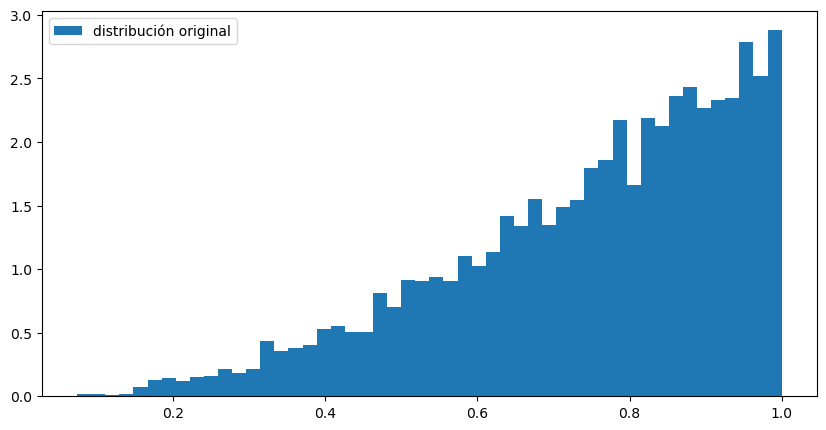

In [25]:
# Comparación de histogramas
# 1. Histograma distribución original
plt.figure(figsize=[10,5])
plt.hist(x, bins=50,density=True, label='distribución original');
plt.legend()

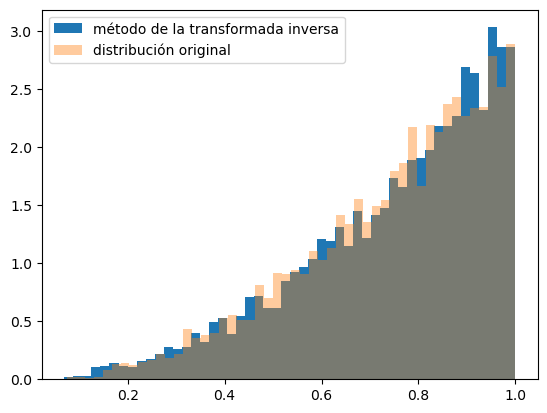

In [26]:
# 2. Implementación del método de la transformada inversa usando función 'ppf'
U = np.random.rand(N)
f_inv = dist(**args).ppf(U)
plt.hist(f_inv, bins=50, density=True, label='método de la transformada inversa');
plt.hist(x, bins=50,density=True, alpha=0.4 , label='distribución original');

plt.legend()

## <font color ='red'> **Ejercicio 2** 
 1. Generación variable aleatoria continua

$$
h(x)=
\begin{cases}
0, & x<0 \\
x, & 0 \le x < 1 \\
2-x, & 1\le x \le 2 \\
0,& x>1
\end{cases}
$$

Genere muestres aleatorias que distribuyan según la función dada usando el método de la transformada inversa y grafique el histograma de 100 muestras generadas con el método y compárela con el función $h(x)$ dada, esto con el fín de validar que el procedimiento fue realizado de manera correcta

### Método de la transformada inversa

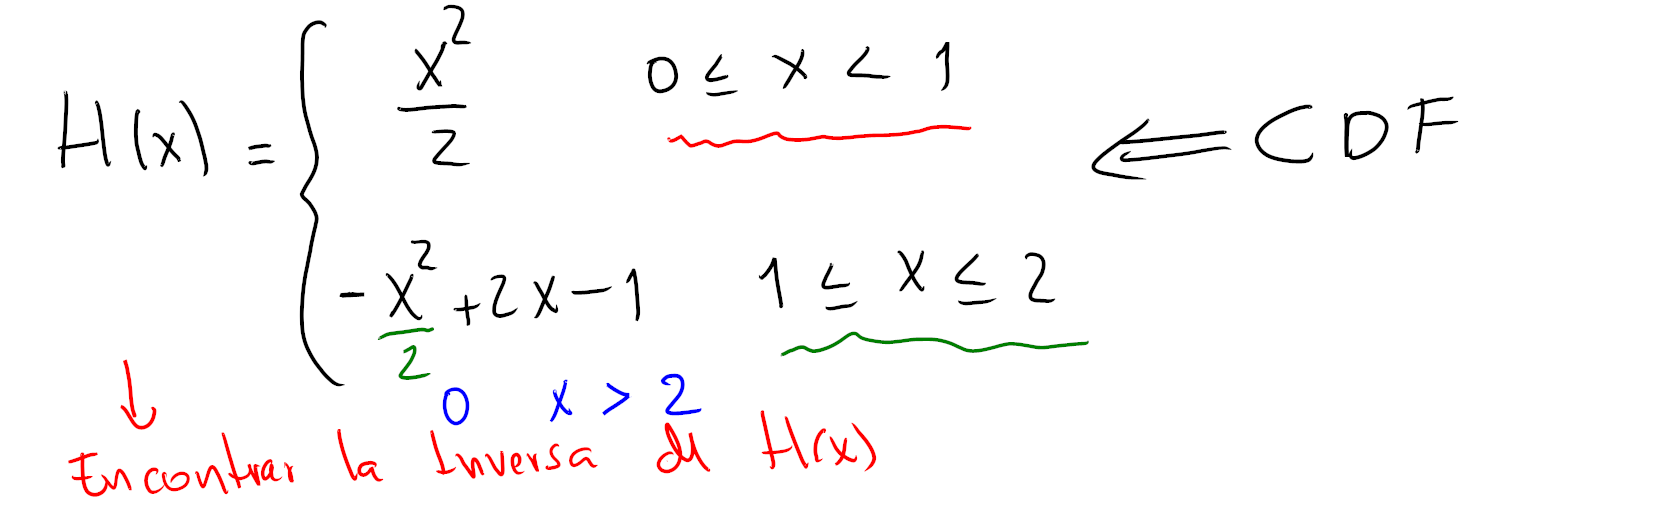

In [36]:
# Crear función acumulada (usar método vectorize(func, otypes=[float]))
H = lambda x: 0 if x < 0 else (x**2/2 if 0 <= x < 1 else (-x**2/2 + 2 * x - 1 if 1 <= x <= 2 else 0))
H = np.vectorize(H, otypes=[float])

array([0.5, 0. ])

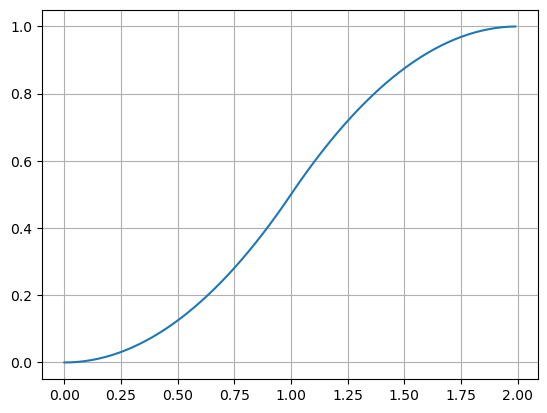

In [45]:
# Graficar función acumulada
x = np.arange(0, 2, 0.01)
plt.plot(x, H(x))
plt.grid()

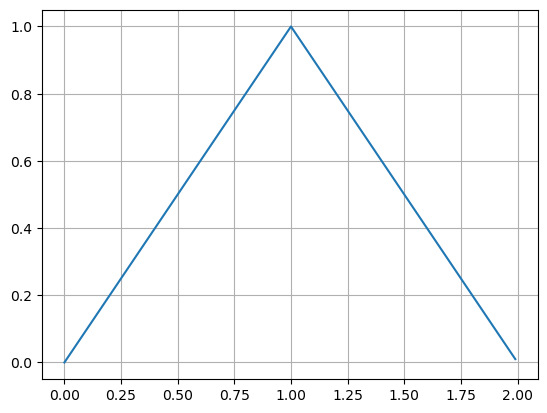

In [44]:
# Función de densidad h(x) 
h = lambda x: 0 if x < 0 else (x if 0 <= x < 1 else (2 - x if 1 <= x <= 2 else 0))
h = np.vectorize(h, otypes=[float])
plt.plot(x, h(x))
plt.grid()

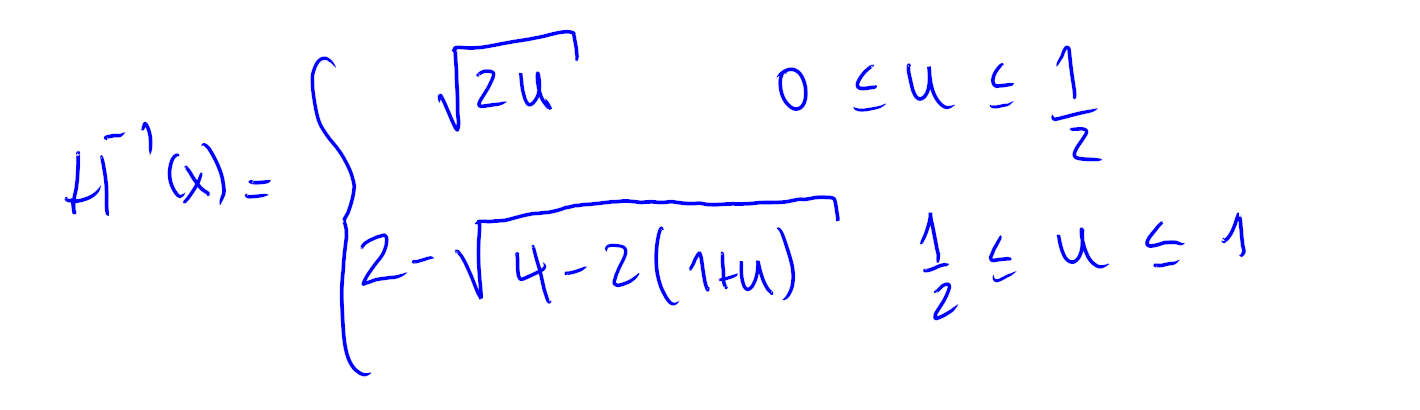

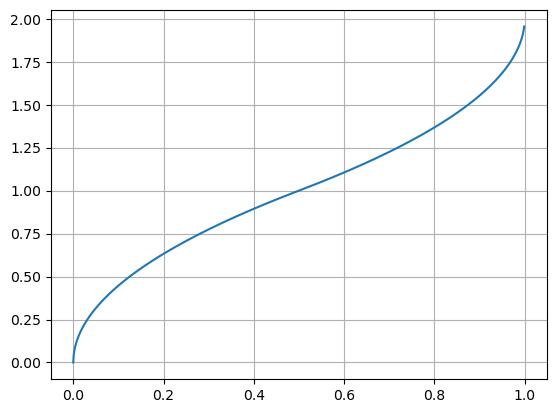

In [46]:
# Crear función inversa
H_inv = lambda u: np.sqrt(2 * u) if 0 <= u <= 0.5 else 2 - np.sqrt(4 - 2*(1 + u))
H_inv = np.vectorize(H_inv, otypes=[float])

# Validar función inversa (gráfica)
u_gra = np.arange(0, 1, 0.001)
plt.plot(u_gra, H_inv(u_gra))
plt.grid()

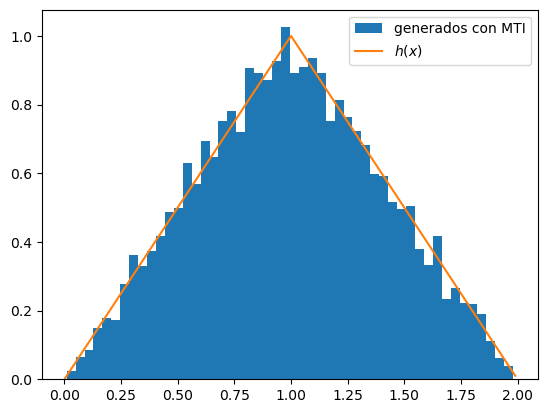

In [47]:
# Vector de aleatorios uniformes
N = 10000
U = np.random.rand(N)

# Vector generado con MTI
x_rand = H_inv(U)

# Graficar histograma aleatorios
plt.hist(x_rand, bins=50, density=True, label='generados con MTI')

# Comparar con gráfica de densidad
density = h(x)

# Graficar función de densidad h(x)
plt.plot(x, density, label='$h(x)$')
plt.legend();

### Método de aceptación y rechazo

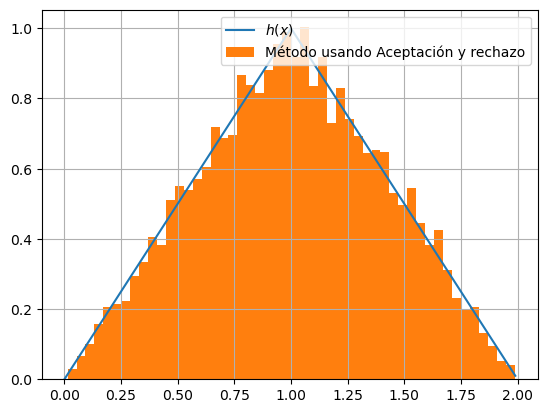

In [54]:
N = 10000

# Graficar densidad de probabilidad h(x)
plt.plot(x, density, label='$h(x)$')
plt.legend();

# Programar método de aceptación y rechazo
max_h = 1
t_x = lambda x: max_h * np.ones(len(x))

R1 = np.random.uniform(0, 2, 2* N)
R2 = np.random.rand(2*N)

condicion = t_x(R1) * R2 <= h(R1)
aceptados = R1[condicion]

# Graficar puntos aceptados
plt.hist(aceptados, bins=50, density=True, label='Método usando Aceptación y rechazo')

# Almacenar números aceptados en una variable y graficar su histograma
plt.legend()
plt.grid()

## Ejercicio 3
Suponga que tiene la siguiente probability mass function 
$$
P(X=k) = 
\begin{cases} 
\frac{1}{3}\left( \frac{2}{3}\right)^{k-1}, & \text{si } k=1, 2, \cdots \\
0, & \text{otro caso}
\end{cases}
$$

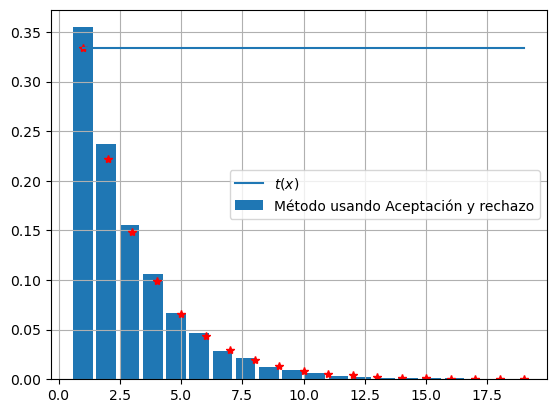

In [63]:
N = 100000
# PMF p(x)
p = lambda k: (1 / 3) * (2 / 3) ** (k-1) 

# Gráfica de pmf
k = np.arange(1, 20)
plt.plot(k, p(k), 'r*')

# Método de aceptación rechazo discreto
max_p = p(1)

# MAR
t_x = lambda x: max_p * np.ones(len(x))
plt.plot(k, t_x(k), label='$t(x)$')

R1 = np.random.randint(1, 20, N)
R2 = np.random.rand(N)

condicion = t_x(R1) * R2 <= p(R1)
aceptados = R1[condicion]

# Graficar puntos aceptados
y, x = np.histogram(aceptados, bins=len(set(aceptados)), density=True)
x = x[:-1]

plt.bar(x, y, label='Método usando Aceptación y rechazo')

# Almacenar números aceptados en una variable y graficar su histograma
plt.legend()
plt.grid()